<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a datagrame**

In [9]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

**Explore bookings data**

In [12]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [14]:
#let's see the dimensions of the data frame (No.of rows & No.of columns)
df_bookings.shape      


(134590, 12)

In [16]:
#let's explore how many room categories are there in the dataframe

df_bookings.room_category.unique()


array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [18]:
# Count the number of bookings for each unique room category in the 'room_category' column of the DataFrame.
# This provides a summary of how many times each room category was booked, sorted in descending order by default.

df_bookings.room_category.value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

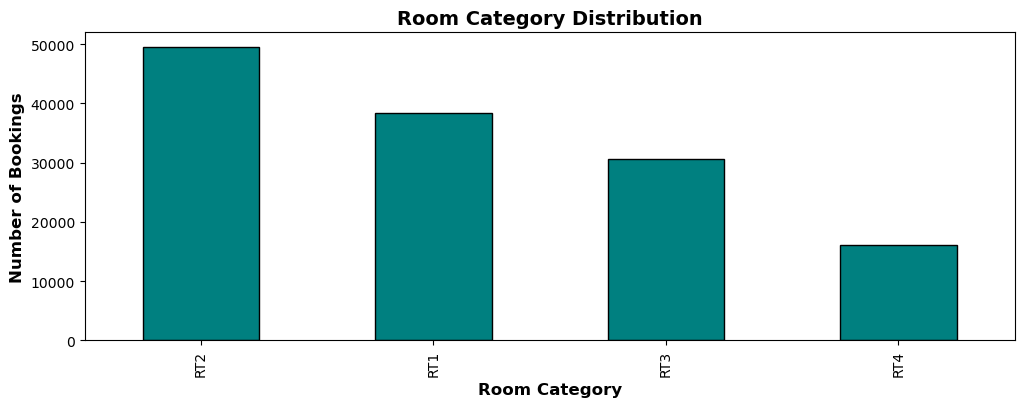

In [20]:

# Plotting the bar chart to visulize the above data so that we can have a better understanding of the distubution
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the data
df_bookings.room_category.value_counts().plot(kind='bar', ax=ax, color='teal', edgecolor='black')

# Add title and labels
ax.set_title('Room Category Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Room Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Bookings', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

In [22]:
# Checking the unique booking platforms used by customers to book hotels

df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [24]:
# Counting the number of bookings made through each booking platform

df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

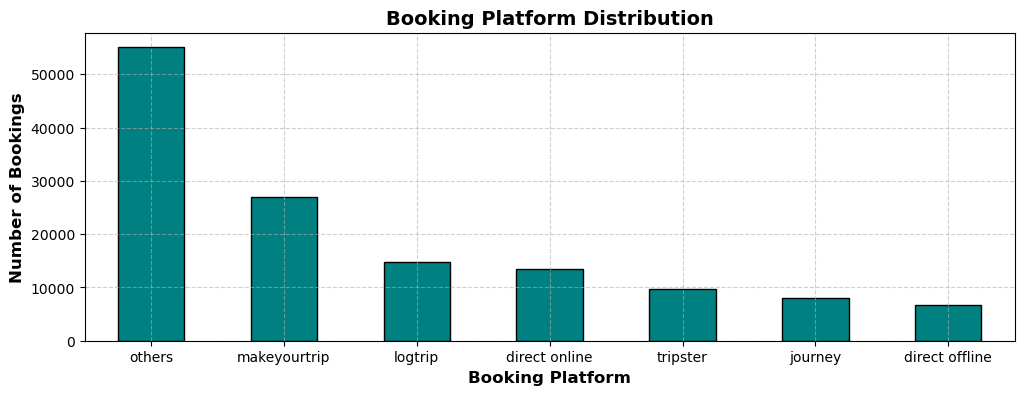

In [314]:
# Plotting the bar chart to visulize the above data so that we can have a better understanding of the distubution
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the data
df_bookings.booking_platform.value_counts().plot(kind='bar', ax=ax, color='teal', edgecolor='black')

# Add title and labels
ax.set_title('Booking Platform Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Booking Platform', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Bookings', fontsize=12, fontweight='bold')

# Add gridlines for better readability
ax.grid(visible=True, which='major', linestyle='--', alpha=0.6)

ax.tick_params(axis='x', rotation=360)

# Show the plot
plt.show()

In [28]:
# Generating summary statistics for numerical columns in the dataset

df_bookings.describe()


,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


<div style="border: 3px solid teal; padding: 10px; border-radius: 5px; width: fit-content;">

### Looking at the summary statistics, here are some of the insights we can draw

##### 1.	Negative Number of Guests:
    Minimum value of no_guests is -17, which is invalid. Hence, this column must undergo a data cleaning process.
#####  2.	Discrepancies in Revenue:
    A huge variation can be noted in revenue_generated as compared to the revenue_realized. Take a look: on average, revenue_generated values are way more compared to means of revenue_realized. Hence, this may show that cancellations are made and bookings are canceled which were also not paid for.
#####  3.	Rough Rating:
    At each property, a rating is assigned, but it was noticed that some have ratings while others are empty. The ratings_given count is way lower, 56,683, compared to the total number of records, 134,590. This could mean that a lot of customers do not leave reviews.
#####  4.	Skewed Revenue Distribution:
    The maximum value of revenue_generated is very high, ₹28,560,000, which might be an outlier. Further investigation of this property or record is required.
#####  5.	Homogeneity of Ratings:
    It would seem that the ratings fall in a very narrow range, with median ratings at 4 and most of them hovering around the average score. This may support a generally good review tendency; however, it is a matter of further investigation into possible associations among particular properties and platforms with high rankings.
#####  6.	Possible Gaps in the Data:
    While property_id, revenue_generated, and revenue_realized are full, no_guests and ratings_given have missing/invalid entries that need to be taken care of while cleaning.

</div>

## **Read rest of the files**

In [32]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [34]:
#let's see the dimensions of the data frame (No.of rows & No.of columns)

df_hotels.shape

(25, 4)

In [36]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [38]:
#Checking the categories of hotels and their count

df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

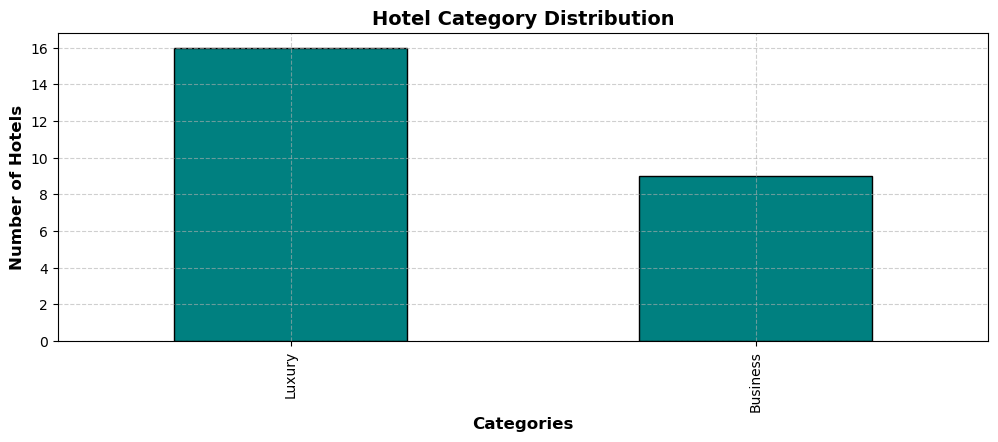

In [298]:
# Plotting the bar chart to visulize the above data so that we can have a better understanding of the distubution
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the data
df_hotels.category.value_counts().plot(kind='bar', ax=ax, color='teal', edgecolor='black')

# Add title and labels
ax.set_title('Hotel Category Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Categories', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Hotels', fontsize=12, fontweight='bold')

# Add gridlines for better readability
ax.grid(visible=True, which='major', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

***
**Explore aggregate bookings**
***

In [43]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


**Find out unique property ids in aggregate bookings dataset**

In [46]:
# write your code here

df_agg_bookings.property_id.unique()


array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Find out total bookings per property_id**

In [49]:
# write your code here
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()


property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**Find out days on which bookings are greater than capacity**

In [52]:
# write your code here

df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]


,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Find out properties that have highest capacity**

In [55]:
# write your code here

df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]


,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [58]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid guests**

In [61]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [64]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [66]:
df_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated**

In [69]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [71]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [73]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [75]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [77]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [79]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [81]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [83]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

In [85]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [87]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661844904

In [89]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [92]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [94]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [97]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [99]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

**In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [104]:
# write your code here

df_agg_bookings.capacity.isnull().sum()


2

In [106]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [108]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(),inplace = True)

/var/folders/32/4m9sv4cs2fgdxwdy92tgz0300000gn/T/ipykernel_1177/4155640710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(),inplace = True)


In [113]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


**In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [116]:
# write your code here
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]


,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [118]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings < df_agg_bookings.capacity]

In [120]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [124]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [126]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

You can use following approach to get rid of SettingWithCopyWarning

In [128]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


Convert it to a percentage value

In [131]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [133]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [135]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9082 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9082 non-null   int64  
 1   check_in_date        9082 non-null   object 
 2   room_category        9082 non-null   object 
 3   successful_bookings  9082 non-null   int64  
 4   capacity             9082 non-null   float64
 5   occ_pct              9082 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 496.7+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [137]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [139]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.779310
RT2    57.752486
RT3    57.604256
RT4    58.017915
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [141]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [143]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [147]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           57.75
Premium         57.60
Presidential    58.02
Standard        57.78
Name: occ_pct, dtype: float64

In [149]:
df[df.room_class=="Standard"].occ_pct.mean().round(2)

57.78

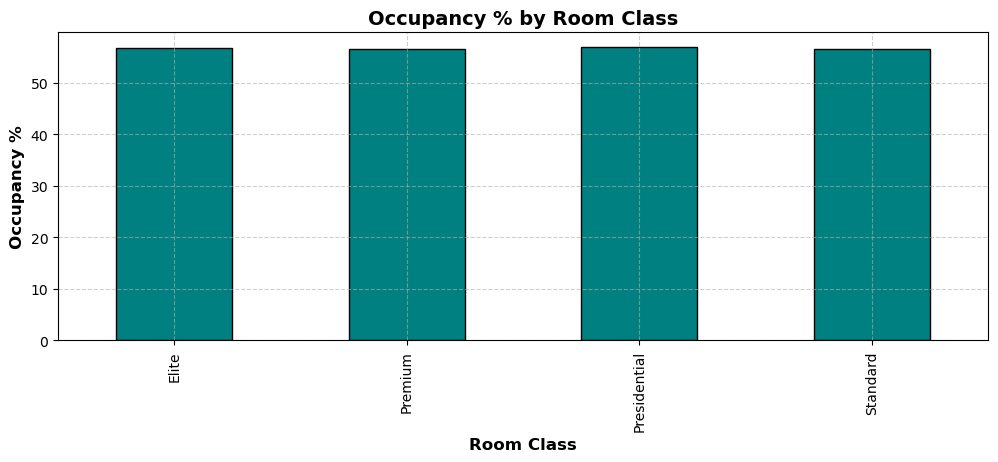

In [296]:
# Plotting the bar chart to visulize the above data so that we can have a better understanding of the distubution
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the data
df.groupby("room_class")["occ_pct"].mean().round(2).plot(kind='bar', ax=ax, color='teal', edgecolor='black')

# Add title and labels
ax.set_title('Occupancy % by Room Class', fontsize=14, fontweight='bold')
ax.set_xlabel('Room Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Occupancy %', fontsize=12, fontweight='bold')

# Add gridlines for better readability
ax.grid(visible=True, which='major', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

**2. Print average occupancy rate per city**

In [155]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [157]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


In [159]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.033283
Delhi        60.629588
Hyderabad    57.795562
Mumbai       57.343912
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [161]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [163]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [165]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.86
weekend     71.33
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [167]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2177,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2178,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2179,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2180,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [169]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.65
Hyderabad    58.21
Mumbai       57.82
Bangalore    56.00
Name: occ_pct, dtype: float64

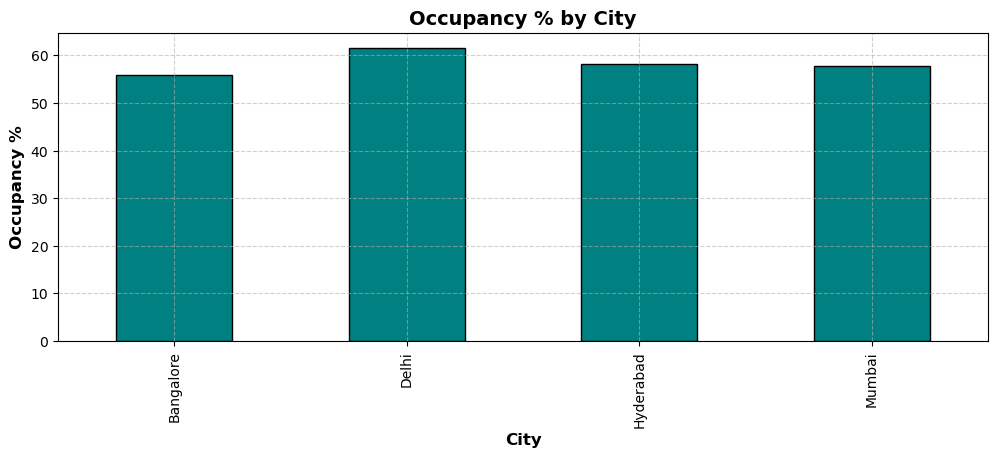

In [294]:
# Plotting the bar chart to visulize the above data so that we can have a better understanding of the distubution
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the data
df_june_22.groupby('city')['occ_pct'].mean().round(2).plot(kind='bar', ax=ax, color='teal', edgecolor='black')

# Add title and labels
ax.set_title('Occupancy % by City', fontsize=14, fontweight='bold')
ax.set_xlabel('City', fontsize=12, fontweight='bold')
ax.set_ylabel('Occupancy %', fontsize=12, fontweight='bold')

# Add gridlines for better readability
ax.grid(visible=True, which='major', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

**5: We got new data for the month of august. Append that to existing data**

In [175]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [177]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [179]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [181]:
df_august.shape

(7, 13)

In [338]:
df.shape

(6497, 14)

In [183]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6425,17558,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6426,19563,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6427,17561,31-Jul-22,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6428,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6429,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6430,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6431,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6432,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6433,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6434,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [185]:
latest_df.shape

(6435, 15)

**6. Print revenue realized per city**

In [188]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [190]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [192]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [194]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [196]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [198]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [200]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [202]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [210]:
df_date["date"] = pd.to_datetime(df_date["date"],format='mixed')
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [206]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [212]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"],format='mixed')
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [214]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [216]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

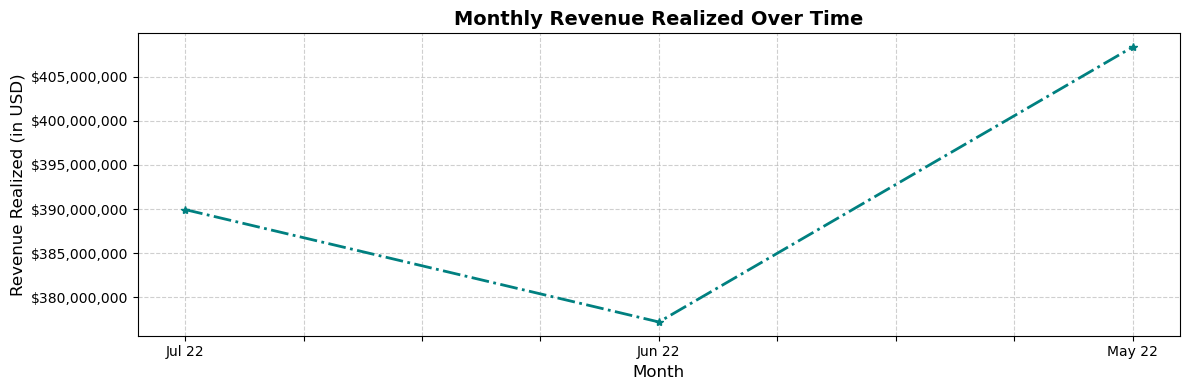

In [248]:
# Plotting the bar chart to visulize the above data so that we can have a better understanding of the distubution
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the data
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum().plot(
    kind='line', ax=ax, color='teal', marker='*', linestyle='-.', linewidth=2
)

# Add title and labels
ax.set_title("Monthly Revenue Realized Over Time", fontsize=14, fontweight='bold')
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Revenue Realized (in USD)", fontsize=12)

# Format y-axis as currency (e.g., $100,000)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add gridlines for better readability
ax.grid(visible=True, which='major', linestyle='--', alpha=0.6)

# Tight layout to avoid clipping
fig.tight_layout()

plt.show()

**Print revenue realized per hotel type**

In [254]:
# write your code here
df_bookings_all.groupby("category")['revenue_realized'].sum()

category
Business    451950715
Luxury      723557067
Name: revenue_realized, dtype: int64

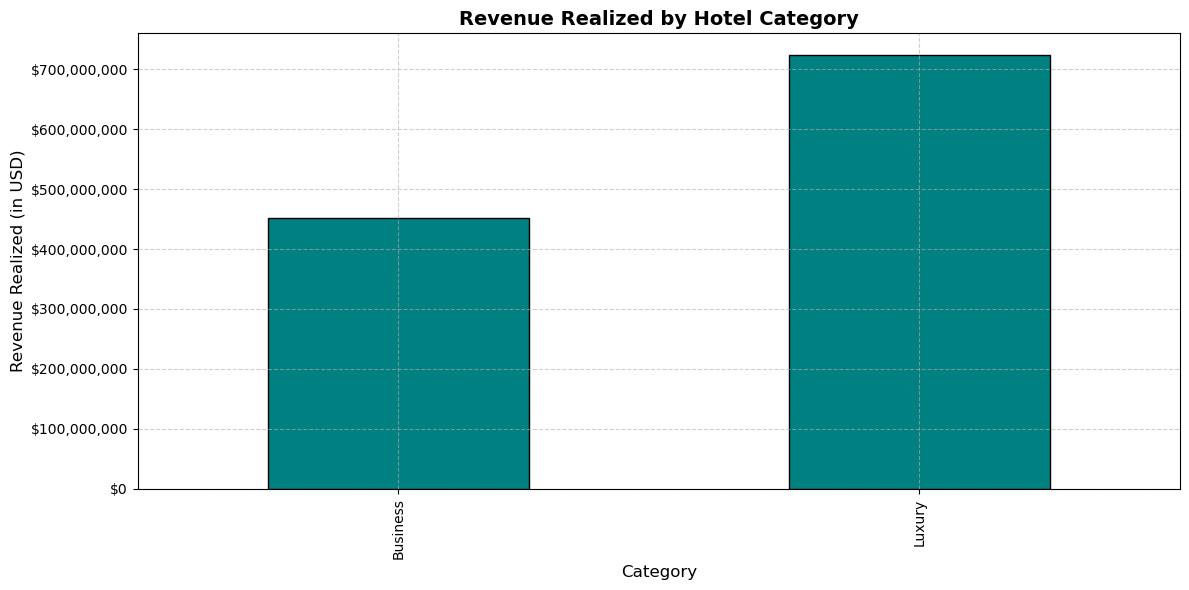

In [262]:
# Plotting the bar chart to visulize the above data so that we can have a better understanding of the distubution
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
df_bookings_all.groupby("category")['revenue_realized'].sum().plot(kind='bar', ax=ax, color='teal', edgecolor='black')

# Add title and labels
ax.set_title("Revenue Realized by Hotel Category", fontsize=14, fontweight='bold')
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Revenue Realized (in USD)", fontsize=12)

# Format y-axis as currency (e.g., $100,000)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add gridlines for better readability
ax.grid(visible=True, which='major', linestyle='--', alpha=0.6)

# Tight layout to avoid clipping
fig.tight_layout()

plt.show()

**Print average rating per city**

In [264]:
# write your code here

df_bookings_all.groupby("city")['ratings_given'].mean()


city
Bangalore    3.403911
Delhi        3.775088
Hyderabad    3.664286
Mumbai       3.644350
Name: ratings_given, dtype: float64

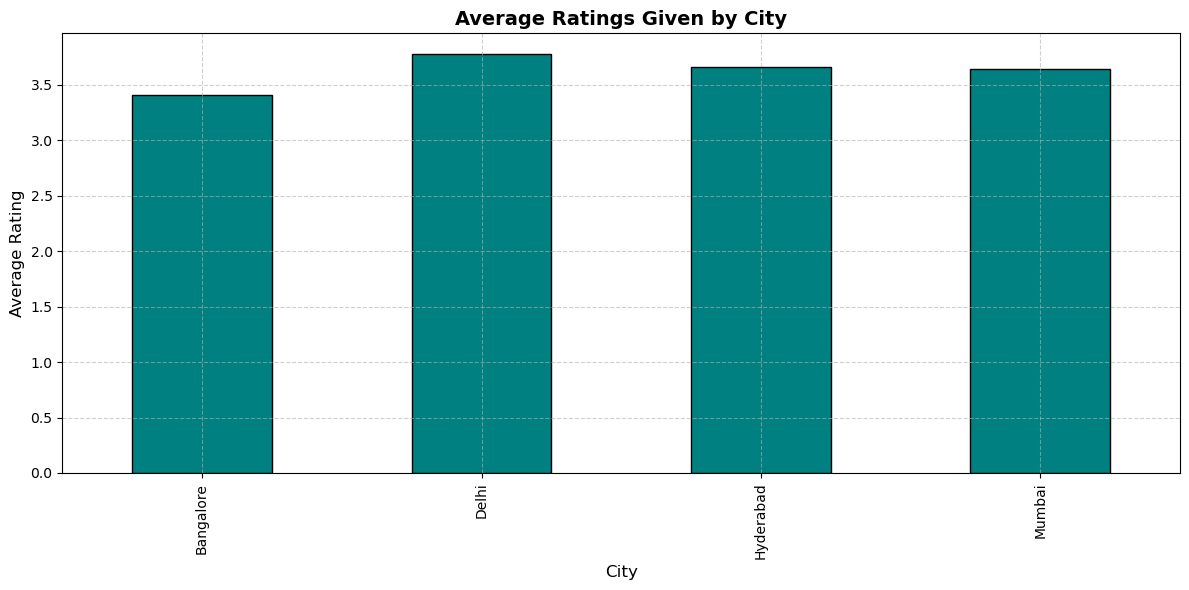

In [270]:
# Plotting the bar chart to visulize the above data so that we can have a better understanding of the distubution
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
df_bookings_all.groupby("city")['ratings_given'].mean().plot(kind='bar', ax=ax, color='teal', edgecolor='black')

# Add title and labels
ax.set_title("Average Ratings Given by City", fontsize=14, fontweight='bold')
ax.set_xlabel("City", fontsize=12)
ax.set_ylabel("Average Rating", fontsize=12)



# Add gridlines for better readability
ax.grid(visible=True, which='major', linestyle='--', alpha=0.6)

# Tight layout to avoid clipping
fig.tight_layout()

plt.show()

**Print a pie chart of revenue realized per booking platform**

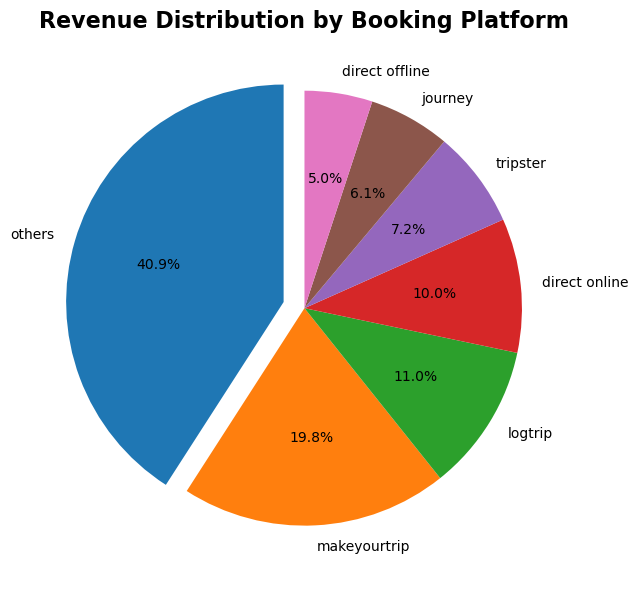

In [292]:

# Data preparation
data = df_bookings_all.groupby("booking_platform")['revenue_realized'].sum()
sorted_data = data.sort_values(ascending=False)

# Create an 'explode' effect for the largest slice
explode = [0.1 if i == 0 else 0 for i in range(len(sorted_data))]  # Explode the largest slice

# Plot the pie chart
fig, ax = plt.subplots(figsize=(12, 6))
sorted_data.plot(
    kind='pie',
    ax=ax,
    autopct='%1.1f%%',  # Show percentages on the pie
    startangle=90,  # Rotate to start from the top
    explode = explode,
    legend=False
)

# Customize the chart
ax.set_title("Revenue Distribution by Booking Platform", fontsize=16, fontweight='bold')
ax.set_ylabel('')  # Remove default y-axis label for pie charts


# Display the plot
plt.tight_layout()
plt.show()

<div style="border: 3px solid teal; padding: 10px; border-radius: 5px; width: fit-content;">
    
# Recommendations

1. **Enhance Pricing Strategies**  
   - Implement **dynamic pricing** during high-demand months to maximize revenue.  
   - Offer discounts for underbooked room categories to improve occupancy rates.  
   - Leverage data-driven pricing tools to identify optimal pricing strategies.
----
2. **Optimize Booking Platforms**  
   - **Incentivize high-performing platforms** with exclusive deals or rewards to maintain their market dominance.  
   - Collaborate with less-utilized platforms to **expand customer reach** and tap into new segments.  
   - Monitor performance metrics to continuously refine platform strategies.
----
3. **Improve Low-Rating Locations**  
   - Focus on **low-rated cities or properties** by addressing customer feedback and upgrading facilities.  
   - Implement **training programs** to enhance service quality.  
   - Promote customer satisfaction surveys to identify areas for improvement.
----
4. **Seasonal Marketing Campaigns**  
   - Launch **targeted campaigns** during low-revenue months to attract customers and stabilize demand.  
   - Use **seasonal promotions** (e.g., holiday discounts, package deals) to drive bookings.  
   - Collaborate with local businesses to create unique bundled experiences.
----
5. **Invest in High-Performing Locations**  
   - Expand operations in cities or areas with **consistent high occupancy** and strong revenue growth.  
   - Introduce **premium offerings** in these locations to attract high-value customers.  
   - Analyze customer preferences to replicate success in similar markets.
</div>